# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#set up variables
names = []
lats = []
lngs = []
max_temps = []
humidities = []
cloudinesses = []
wind_speeds = []
countries = []
count = 1

#start for loop to iterate through selected cities
for city in cities:
    # print count to keep track of row
    print(f"Processing {count} of {len(cities)} : {city}")
    
    # use try statement in case the city does not work in url
    try:
        #get url for each city
        url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
        weather_response = requests.get(url)
        weather_json = weather_response.json()
        
        # retrieve data
    
        name = country = weather_json["name"]
        lat = weather_json["coord"]["lat"]
        long = weather_json["coord"]["lon"]
        max_temp = weather_json["main"]["temp_max"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json["clouds"]["all"]
        wind_speed = weather_json["wind"]["speed"]
        country = weather_json["sys"]["country"]
        
        #add retrieved data to set
        names.append(name)
        lats.append(lat)
        lngs.append(long)
        max_temps.append(max_temp)
        humidities.append(humidity)
        cloudinesses.append(cloudiness)
        wind_speeds.append(wind_speed)
        countries.append(country)
    
    #if error occurs, skip city
    except KeyError:
        print("City not found. Continuing ...")
    
    #add to count to keep track of row
    count=count+1

# final print   
print("-----------------------------------")
print("Data Retrieval Complete")

Processing 1 of 641 : sentyabrskiy
City not found. Continuing ...
Processing 2 of 641 : russkaya polyana
Processing 3 of 641 : jieshi
Processing 4 of 641 : lebu
Processing 5 of 641 : samusu
City not found. Continuing ...
Processing 6 of 641 : taolanaro
City not found. Continuing ...
Processing 7 of 641 : pueblo nuevo
Processing 8 of 641 : cidreira
Processing 9 of 641 : naze
Processing 10 of 641 : northam
Processing 11 of 641 : bemidji
Processing 12 of 641 : lagoa
Processing 13 of 641 : ushuaia
Processing 14 of 641 : konevo
Processing 15 of 641 : narsaq
Processing 16 of 641 : ambon
Processing 17 of 641 : padang
Processing 18 of 641 : svetlogorsk
Processing 19 of 641 : khani
Processing 20 of 641 : albany
Processing 21 of 641 : hualmay
Processing 22 of 641 : havre-saint-pierre
Processing 23 of 641 : ulyanovsk
Processing 24 of 641 : thompson
Processing 25 of 641 : sao joao da barra
Processing 26 of 641 : yellowknife
Processing 27 of 641 : provideniya
Processing 28 of 641 : mayumba
Processi

Processing 230 of 641 : vestmannaeyjar
Processing 231 of 641 : ormara
Processing 232 of 641 : komsomolskiy
Processing 233 of 641 : nantucket
Processing 234 of 641 : mae hong son
Processing 235 of 641 : khandyga
Processing 236 of 641 : tautira
Processing 237 of 641 : bengkulu
Processing 238 of 641 : hayden
Processing 239 of 641 : lukovetskiy
Processing 240 of 641 : zomba
Processing 241 of 641 : seoul
Processing 242 of 641 : gazojak
Processing 243 of 641 : butterworth
Processing 244 of 641 : tomohon
Processing 245 of 641 : novyy urgal
Processing 246 of 641 : chuguyevka
Processing 247 of 641 : puerto leguizamo
Processing 248 of 641 : ancud
Processing 249 of 641 : teocaltiche
Processing 250 of 641 : coihaique
Processing 251 of 641 : celestun
Processing 252 of 641 : balikpapan
Processing 253 of 641 : salisbury
Processing 254 of 641 : ouadda
Processing 255 of 641 : alcaniz
Processing 256 of 641 : los llanos de aridane
Processing 257 of 641 : nenjiang
Processing 258 of 641 : oktyabrskiy
Proce

Processing 458 of 641 : vanimo
Processing 459 of 641 : gimli
Processing 460 of 641 : guicheng
City not found. Continuing ...
Processing 461 of 641 : ambilobe
Processing 462 of 641 : tazovskiy
Processing 463 of 641 : damietta
Processing 464 of 641 : urcos
Processing 465 of 641 : hay river
Processing 466 of 641 : lasa
Processing 467 of 641 : nioro
Processing 468 of 641 : grand gaube
Processing 469 of 641 : gempol
Processing 470 of 641 : orlik
Processing 471 of 641 : lavrentiya
Processing 472 of 641 : kuzovatovo
Processing 473 of 641 : chimoio
Processing 474 of 641 : odweyne
Processing 475 of 641 : tineo
Processing 476 of 641 : naberera
Processing 477 of 641 : masingbi
Processing 478 of 641 : asyut
Processing 479 of 641 : abu samrah
Processing 480 of 641 : tirumullaivasal
Processing 481 of 641 : krasnoselkup
Processing 482 of 641 : innisfail
Processing 483 of 641 : kodinsk
Processing 484 of 641 : vigrestad
Processing 485 of 641 : fortuna
Processing 486 of 641 : altamira
Processing 487 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#set up dataframes by zipping all sets made above

weather_df = pd.DataFrame(list(zip(names,lats,lngs,max_temps,humidities,cloudinesses,wind_speeds,countries)),columns=["name","lat","long","max_temp","humidity","cloudiness","wind_speed","country"])
weather_df

,name,lat,long,max_temp,humidity,cloudiness,wind_speed,country
0,Ruska Poliana,49.4170,31.9201,84.24,42,11,6.44,UA
1,Jieshi,22.8134,115.8257,86.95,80,78,14.18,CN
2,Lebu,-37.6167,-73.6500,47.37,67,1,21.88,CL
3,Pueblo Nuevo,23.3833,-105.3833,67.32,58,74,0.45,MX
4,Cidreira,-30.1811,-50.2056,54.72,64,62,19.39,BR
...,...,...,...,...,...,...,...,...
584,Ascension,30.2169,-90.9001,90.00,80,1,0.00,US
585,Senhor do Bonfim,-10.4614,-40.1894,76.12,64,82,8.57,BR
586,Gao,16.6362,1.6370,95.23,39,100,14.07,ML
587,Daye,30.0833,114.9500,78.04,93,31,8.68,CN


In [5]:
# make sure humidity max is 100

weather_df.describe()

,lat,long,max_temp,humidity,cloudiness,wind_speed
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,20.677554,17.829872,72.512835,68.412564,55.266553,7.992394
std,32.117421,89.681499,14.439608,21.488992,38.941984,5.475218
min,-54.800000,-175.200000,33.890000,4.000000,0.000000,0.000000
25%,-4.062500,-63.598600,63.550000,57.000000,11.000000,3.870000
50%,22.600000,22.400700,74.430000,73.000000,67.000000,6.930000
75%,47.693100,97.968300,82.600000,86.000000,94.000000,11.250000
max,78.218600,179.316700,116.020000,100.000000,100.000000,32.970000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

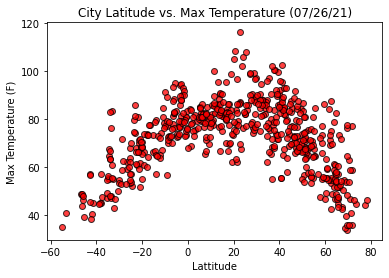

In [6]:
plt.scatter(weather_df["lat"], weather_df["max_temp"], marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)
plt.xlabel('Lattitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (07/26/21)')
plt.show()

## Latitude vs. Humidity Plot

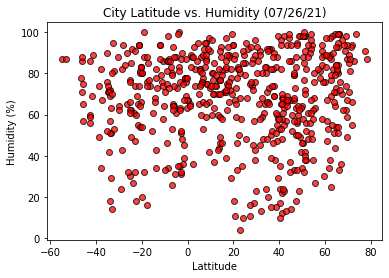

In [7]:
plt.scatter(weather_df["lat"], weather_df["humidity"], marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)
plt.xlabel('Lattitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (07/26/21)')
plt.show()

## Latitude vs. Cloudiness Plot

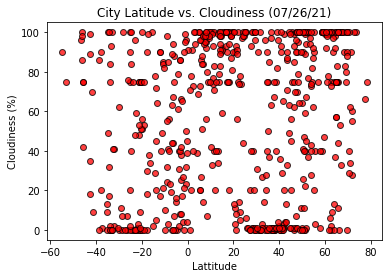

In [8]:
plt.scatter(weather_df["lat"], weather_df["cloudiness"], marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (07/26/21)')
plt.show()

## Latitude vs. Wind Speed Plot

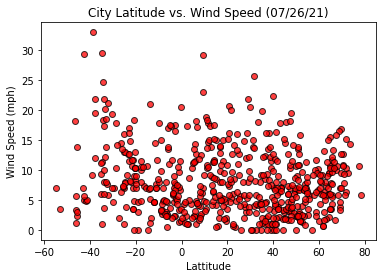

In [9]:
plt.scatter(weather_df["lat"], weather_df["wind_speed"], marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (07/26/21)')
plt.show()

## Linear Regression

In [10]:
# set north and south dataframes
northern_df = weather_df[weather_df['lat']>=0]
southern_df = weather_df[weather_df['lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-value is: -0.6042739205342634


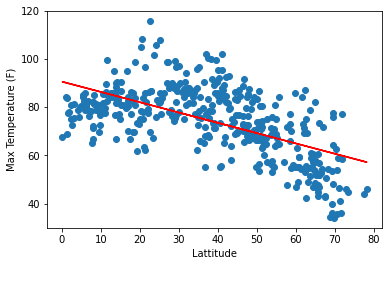

In [11]:
x_values = northern_df['lat']
y_values = northern_df['max_temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Max Temperature (F)')
print(f"R-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-value is: 0.8163136797624096


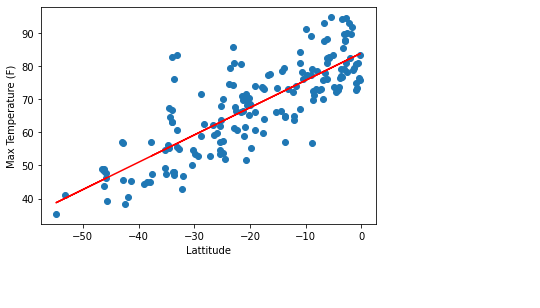

In [12]:
x_values = southern_df['lat']
y_values = southern_df['max_temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Max Temperature (F)')
print(f"R-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-value is: 0.0006346648669825293


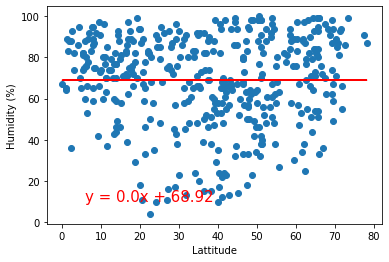

In [13]:
x_values = northern_df['lat']
y_values = northern_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Humidity (%)')
print(f"R-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-value is: 0.006473287178580591


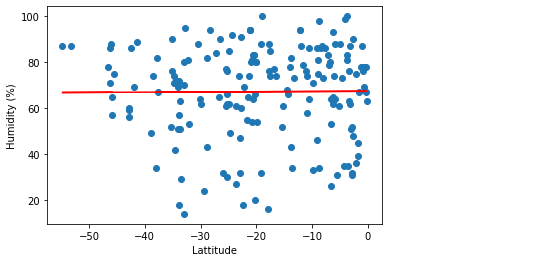

In [14]:
x_values = southern_df['lat']
y_values = southern_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Humidity (%)')
print(f"R-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-value is: -0.04512758928293808


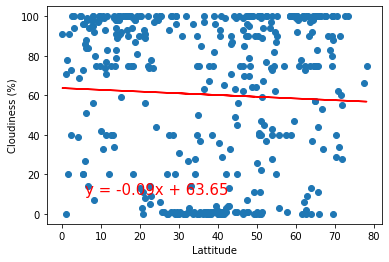

In [15]:
x_values = northern_df['lat']
y_values = northern_df['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness (%)')
print(f"R-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-value is: -0.06930562549166698


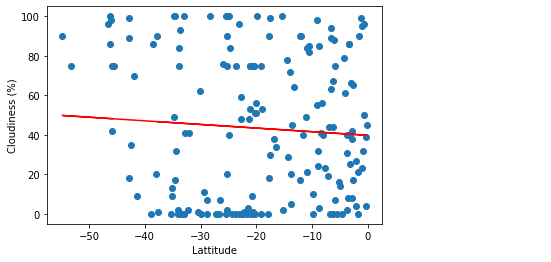

In [16]:
x_values = southern_df['lat']
y_values = southern_df['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness (%)')
print(f"R-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-value is: -0.053191475025722045


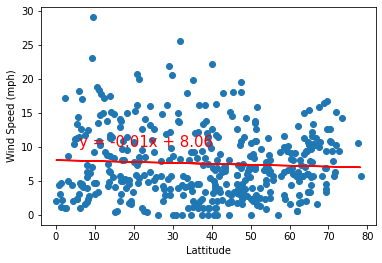

In [17]:
x_values = northern_df['lat']
y_values = northern_df['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed (mph)')
print(f"R-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-value is: -0.23765734231364885


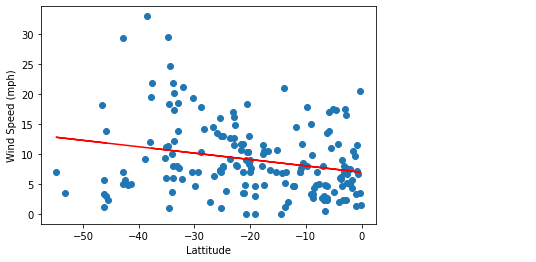

In [18]:
x_values = southern_df['lat']
y_values = southern_df['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed (mph)')
print(f"R-value is: {rvalue}")
plt.show()

In [19]:
weather_df.to_csv("output/weather_data.csv", index=False, header=True)